In [1]:
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt

%matplotlib inline

from trabonesim import TraBoneSim

### 1) initalize object

In [2]:
te_s = np.linspace(start=0, stop=10e-3, num=30)

T = TraBoneSim(bonecube_id='P8',
                      inputdir='../data/',
                      field_strength_t=3,
                      b0dir=[0, 0, 1],
                      dchi_ppm=2,  # bone - marrow
                      te_s=te_s,
                      t2_bone_ms=0.5,
                      t2_marrow_ms=60,
                      binary_erosion=None,
                      binary_erosion_se=None,
                      fat_spec=False,
                      rho_bone=0,
                      voxel_size_ct_mm=45.6e-3,
                      voxel_size_mr_mm=1.5)

### 2) Forward simulation for different Bv/Tv

In [3]:
bEs = [1, 2, None, -4]

box = slice(2, 9)
sig_curve = []
bv_tv = []

for T.binary_erosion in bEs:
    T.set_bone_mask()
    T.simulate_rdf_ppm()
    T.simulate_signal()
    T.downsample_signal()

    bv_tv = np.append(bv_tv, T.get_bvtv() * 100)

    print('bv/tv: ' + str(bv_tv[-1]))

    sig_curve.append(np.mean(np.abs(T.smacro[box, box, box, :]), axis=(0, 1, 2)))



bonecube_id = P8
inputdir = ../data/
binary_erosion = 1
binary_erosion_se = None

Load Data. Done.
Forward simulate RDF. Done.
Generate microscopic signal. Done.
Downsample to MR signal. Done.
bv/tv: 26.429047937043098

bonecube_id = P8
inputdir = ../data/
binary_erosion = 2
binary_erosion_se = None

Load Data. Done.
Forward simulate RDF. Done.
Generate microscopic signal. Done.
Downsample to MR signal. Done.
bv/tv: 15.850722153046007

bonecube_id = P8
inputdir = ../data/
binary_erosion = None
binary_erosion_se = None

Load Data. Done.
Forward simulate RDF. Done.
Generate microscopic signal. Done.
Downsample to MR signal. Done.
bv/tv: 37.56334895478533

bonecube_id = P8
inputdir = ../data/
binary_erosion = -4
binary_erosion_se = None

Load Data. Done.
Forward simulate RDF. Done.
Generate microscopic signal. Done.
Downsample to MR signal. Done.
bv/tv: 73.5937656453903


### 3) plot Figure 2A

(-200.0, 0.0)

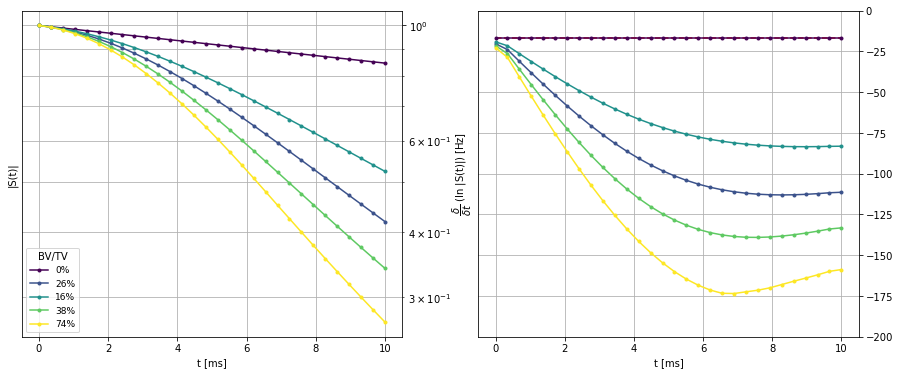

In [6]:
nlines = sig_curve.__len__()

colors = cm.viridis(np.linspace(0, 1, nlines+1))

fig, ax = plt.subplots(1, 2, figsize=(15, 6))
t2_marrow_ms = 60
r2_marrow_hz = 1000 / t2_marrow_ms

smicro = np.exp(- np.multiply(r2_marrow_hz, te_s))
smicro /= np.max(smicro)

# plot number 1
ax[0].plot(te_s*1000, smicro, '.-', label='0%', color=colors[0])
for i in range(0, nlines):
    s = sig_curve[i]
    s /= np.max(s)
    ax[0].plot(te_s*1000, s, '.-', label='{0:.0f}%'.format(bv_tv[i]), color=colors[i+1])
ax[0].legend(ncol=1, title='BV/TV', fontsize=9)
ax[0].set_ylabel('|S(t)|')
ax[0].set_xlabel('t [ms]')
ax[0].grid(which='both')
ax[0].set_yscale('log')
ax[0].yaxis.tick_right()

# plot number 2
ax[1].plot(te_s*1000, np.gradient(np.log(smicro), te_s), '.-', label='0%', color=colors[0])
for i in range(0, nlines):
    s = sig_curve[i]
    s /= np.max(s)
    ax[1].plot(te_s*1000, np.gradient(np.log(s), te_s), '.-', label='{0:.0f}%'.format(bv_tv[i]), color=colors[i+1])
ax[1].set_xlabel('t [ms]')
ax[1].set_ylabel(r'$\dfrac{\delta}{\delta t}$ (ln |S(t)|) [Hz]')
ax[1].grid(which='both')
ax[1].yaxis.tick_right()
ax[1].hlines(-1/60 *1000, 0, 10, colors='r', linestyles='dashed')
ax[1].set_ylim(-200, 0)